In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['figure.figsize'] = (8.0,5.0)

/Users/zhenwuzhou/environment/tf2_py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


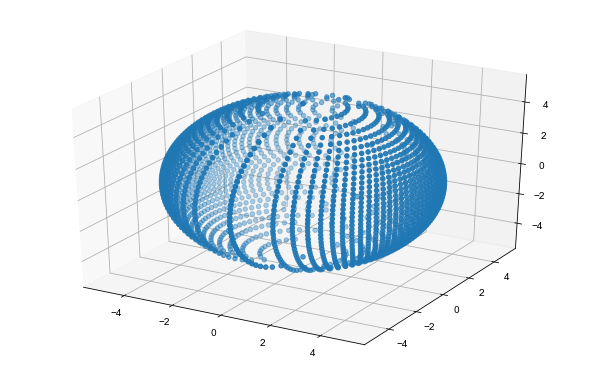

In [2]:
fig = plt.figure() # 定义画布
ax = Axes3D(fig) # 将3D网格绘制在画布上

R = 5 # 球体半径
distance = 0.25
X = []
Y = []
Z = []
for z in np.arange(-R,R+distance,distance):
    r = np.sqrt(R**2 - np.abs(z)**2)
#     print(r)
#     print("=======")
    for y in np.arange(-r,r+distance,distance):
        r2 = np.sqrt(r**2 - np.abs(y)**2) 
        # 添加两个点
        X.extend([r2,-r2])
        Y.extend([y,y])
        Z.extend([z,z])
ax.scatter(X,Y,Z) # 绘制点
plt.show()

/Users/zhenwuzhou/environment/tf2_py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


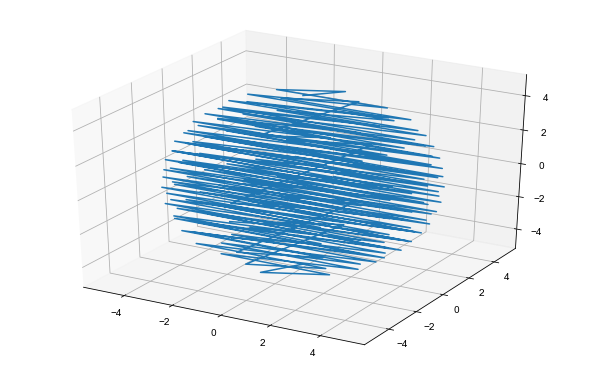

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
R = 5
distance = 1
X = []
Y = []
Z = []
for z in np.arange(-R,R+distance,distance):
    r = np.sqrt(R**2 - np.abs(z)**2)
    for y in np.arange(-r,r+distance,distance):
        r2 = np.sqrt(r**2 - np.abs(y)**2) 
        # 添加两个点
        X.extend([r2,-r2])
        Y.extend([y,y])
        Z.extend([z,z])
ax.plot(X,Y,Z)
plt.show()

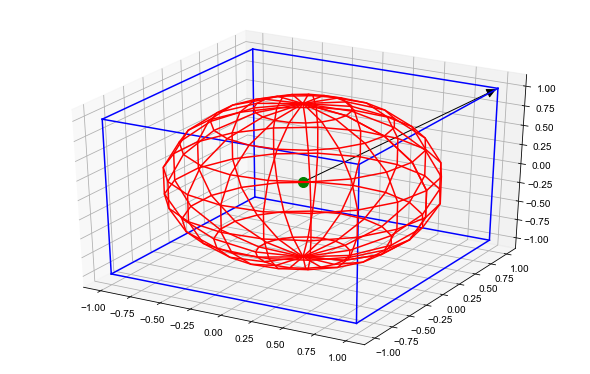

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = Axes3D(fig)
# ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.show()

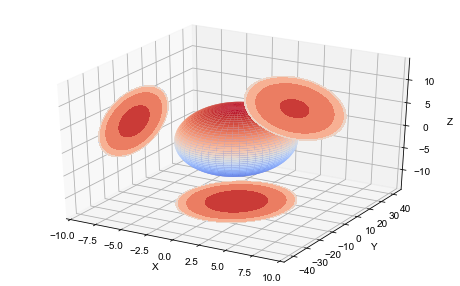

In [11]:
# -*- coding: utf-8 -*-
'''椭球面'''
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
a,b,c= 5.0,25.0,7.0
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b',cmap=cm.coolwarm)

cset = ax.contourf(x, y, z, zdir='x', offset=-2*a, cmap=cm.coolwarm)
cset = ax.contourf(x, y, z, zdir='y', offset=1.8*b, cmap=cm.coolwarm)
cset = ax.contourf(x, y, z, zdir='z', offset=-2*c, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-2*a, 2*a)
ax.set_ylabel('Y')
ax.set_ylim(-1.8*b, 1.8*b)
ax.set_zlabel('Z')
ax.set_zlim(-2*c, 2*c)

plt.show()